In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint

In [2]:
# Load data dari device
data_bank = pd.read_csv("Downloads/banking.csv")
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## 1. Data Deskriptif & Visualisasinya

In [4]:
# Menampilkan data deskriptif dalam DataFrame data_bank
data_bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
# Menampilkan data deskriptif untuk tipe kolom bertipe string/object
data_bank.describe(include = "O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Karena pada data deskriptif tidak terlalu menarik untuk dilihat, maka kami akan membuatkan sebuah visualisasi untuk data deskriptif, seperti mean, median, standard deviasi, nilai maximum dan minimum.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Previous'}, xlabel='previous', ylabel='Density'>

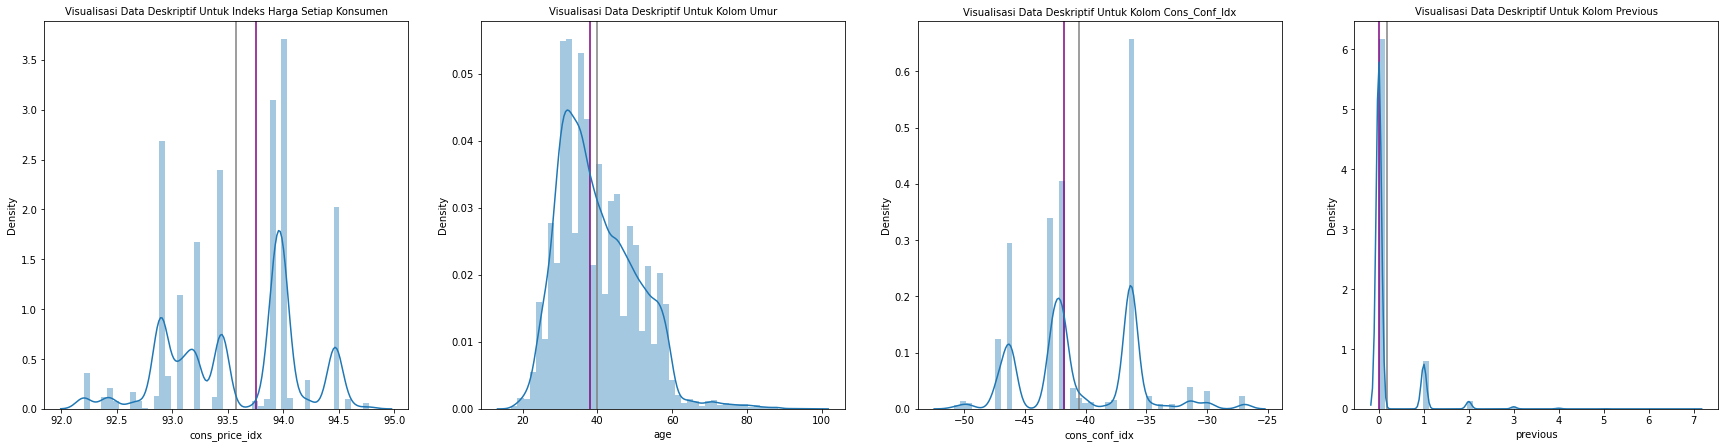

In [6]:
# Melakukan visualisasi data deskriptif (Mean & Median) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom indeks harga setiap konsumen
plt.subplot(6,4,1)
plt.axvline(data_bank["cons_price_idx"].mean(), color = "gray", label="mean")
plt.axvline(data_bank["cons_price_idx"].median(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Indeks Harga Setiap Konsumen", fontsize=10)
sns.distplot(data_bank["cons_price_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,2)
plt.axvline(data_bank["age"].mean(), color="gray", label="mean")
plt.axvline(data_bank["age"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Umur", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,3)
plt.axvline(data_bank["cons_conf_idx"].mean(), color="gray", label="mean")
plt.axvline(data_bank["cons_conf_idx"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Cons_Conf_Idx", fontsize=10)
sns.distplot(data_bank["cons_conf_idx"])

# Melakukan visualisasi data deskriptif untuk kolom umur
plt.subplot(6,4,4)
plt.axvline(data_bank["previous"].mean(), color="gray", label="mean")
plt.axvline(data_bank["previous"].median(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Previous", fontsize=10)
sns.distplot(data_bank["previous"])

Ket:
1. Terlihat pada kolom cons_price_idx mempunyai nilai rata2 dan median sama dengan ketika kami menggunakan sebuah fungsi .describe(), yaitu nilai rata2 berada di nilai 93.5 sedangkan nilai mediannya adalah 93.749.
2. Terlihat pada kolom age/umur dalam sebuah dataset bank marketing mempunyai nilai rata2 yaitu 40 tahun sedangkan pada nilai median mempunyai nilai yaitu sekitar umur 37 - 38 tahun.
3. Pada kolom consumer confidence index atau indeks kepercayaan konsumen bank memiliki selisih yang sangat tipis antara nilai rata2 dan median. Pada nilai rata2 terdapat -40.502600 sedangkan nilai median yaitu -41.800000.
4. Dan terakhir pada kolom previous, nilai rata2 adalah 0.172963 sedangkan nilai mediannya adalah 0.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate'}, xlabel='emp_var_rate', ylabel='Density'>

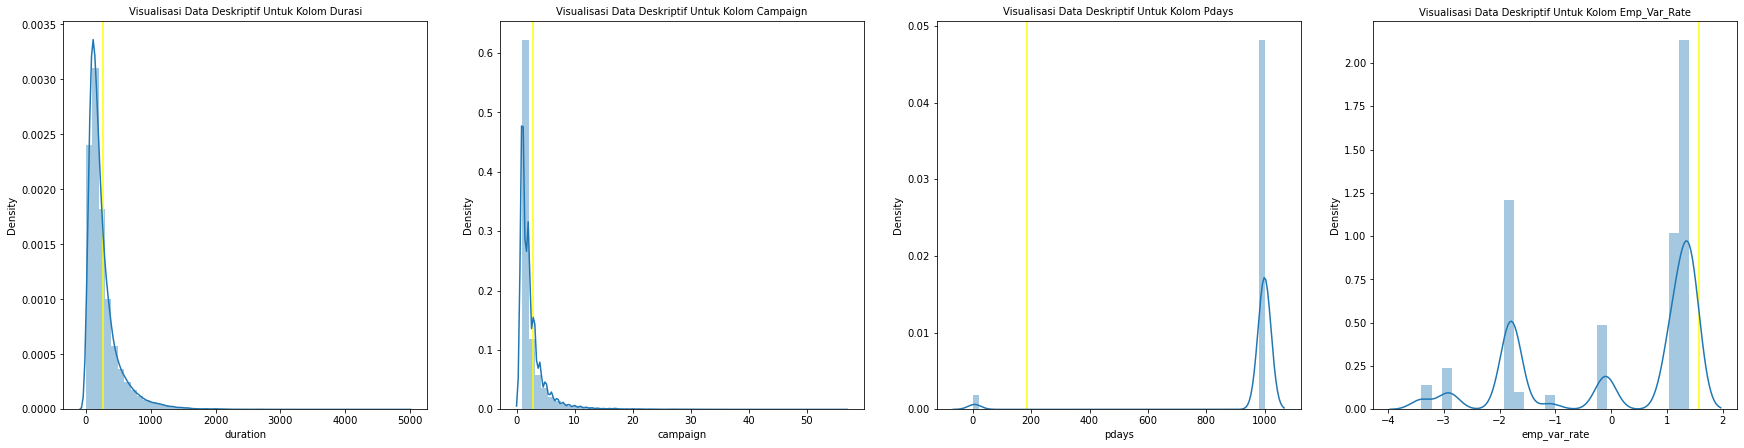

In [7]:
# Melakukan visualisasi data deskriptif (Standard Deviasi) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom duration
plt.subplot(6,4,1)
plt.axvline(data_bank["duration"].std(), color = "yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Durasi", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,2)
plt.axvline(data_bank["campaign"].std(), label="std", color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,3)
plt.axvline(data_bank["pdays"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

# Melakukan visualisasi data deskriptif untuk kolom emp_var_rate
plt.subplot(6,4,4)
plt.axvline(data_bank["emp_var_rate"].std(), color="yellow")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Emp_Var_Rate", fontsize=10)
sns.distplot(data_bank["emp_var_rate"])

Ket:

1. Terlihat pada kolom duration mempunyai nilai standard deviasi adalah 259.279249.
2. Terlihat pada kolom campaign dalam sebuah dataset bank marketing mempunyai standard deviasi berada di sekitar nilai 2.
3. Pada kolom pdays memiliki nilai standard deviasi yaitu 186.910907.
4. Dan terakhir nilai standard deviasi pada kolom emp_var_rate adalah 1.570960.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:title={'center':'Visualisasi Data Deskriptif Untuk Kolom pdays'}, xlabel='pdays', ylabel='Density'>

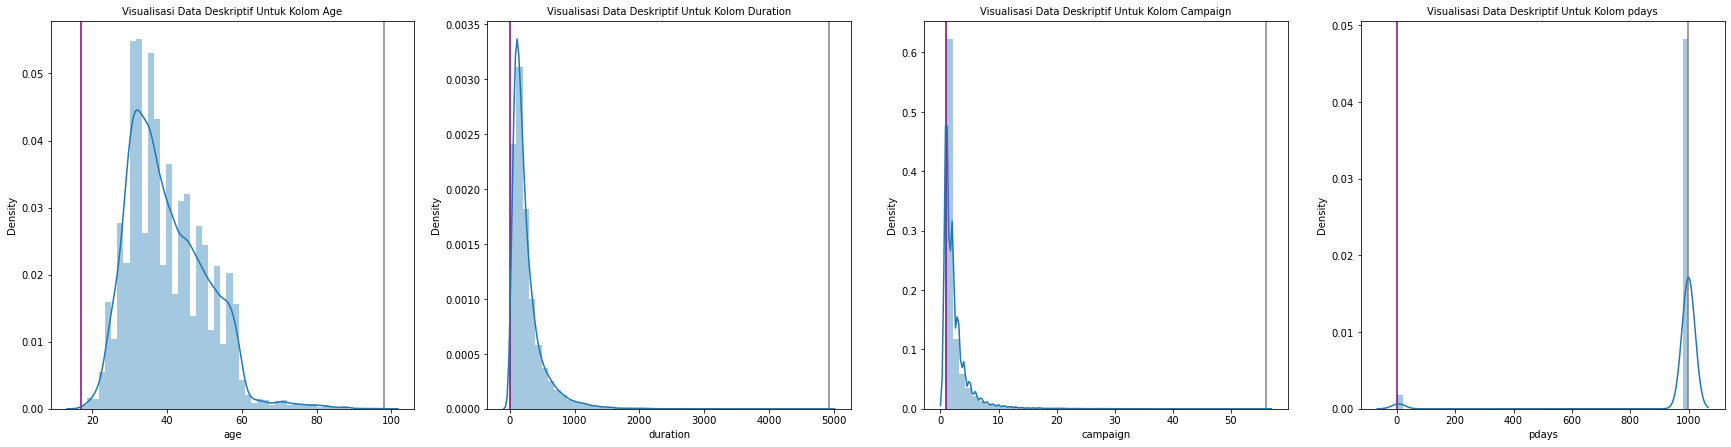

In [8]:
# Melakukan visualisasi data deskriptif (Max & Min) untuk 4 kolom
plt.figure(figsize = (30, 50))

# Melakukan visualisasi data deskritif untuk kolom umur
plt.subplot(6,4,1)
plt.axvline(data_bank["age"].max(), color = "gray", label="mean")
plt.axvline(data_bank["age"].min(), color = "purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Age", fontsize=10)
sns.distplot(data_bank["age"])

# Melakukan visualisasi data deskriptif untuk kolom durasi
plt.subplot(6,4,2)
plt.axvline(data_bank["duration"].max(), color="gray", label="mean")
plt.axvline(data_bank["duration"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Duration", fontsize=10)
sns.distplot(data_bank["duration"])

# Melakukan visualisasi data deskriptif untuk kolom campaign
plt.subplot(6,4,3)
plt.axvline(data_bank["campaign"].max(), color="gray", label="mean")
plt.axvline(data_bank["campaign"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Campaign", fontsize=10)
sns.distplot(data_bank["campaign"])

# Melakukan visualisasi data deskriptif untuk kolom pdays
plt.subplot(6,4,4)
plt.axvline(data_bank["pdays"].max(), color="gray", label="mean")
plt.axvline(data_bank["pdays"].min(), color="purple", label="median")
plt.title("Visualisasi Data Deskriptif Untuk Kolom pdays", fontsize=10)
sns.distplot(data_bank["pdays"])

## 2. Visualisasi Sebelum Pre-Processing

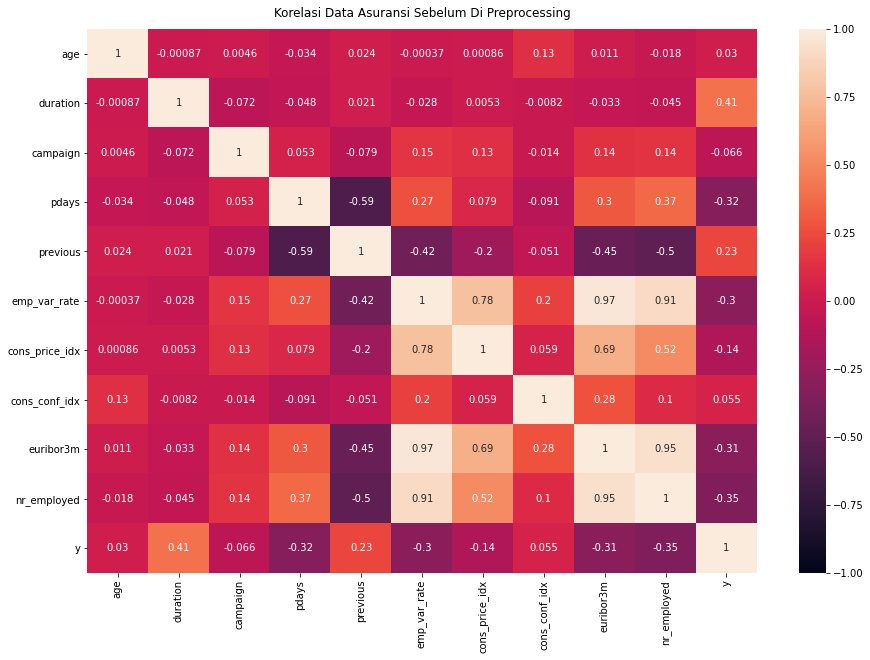

In [9]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Sebelum Di Preprocessing", fontdict={"fontsize":12}, pad=12);

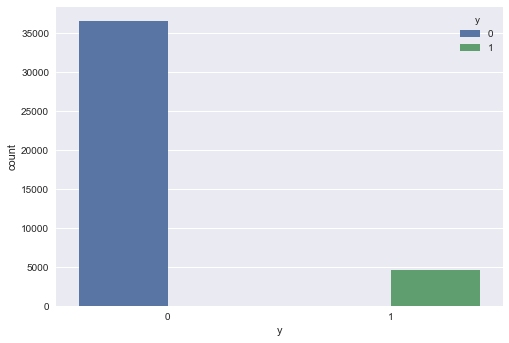

<Figure size 720x720 with 0 Axes>

In [10]:
# Melakukan visualisasi untuk kolom y

plt.style.use("seaborn") # Untuk menjadikan grafik matplotlib menggunakan style yang dimiliki oleh library seaborn
sns.countplot(x="y", hue="y", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

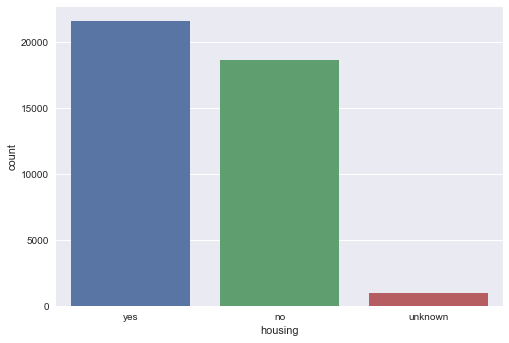

<Figure size 720x720 with 0 Axes>

In [11]:
# Melakukan visualisasi untuk kolom housing

sns.countplot(x="housing", data=data_bank)
plt.figure(figsize=(10, 10))
plt.show()

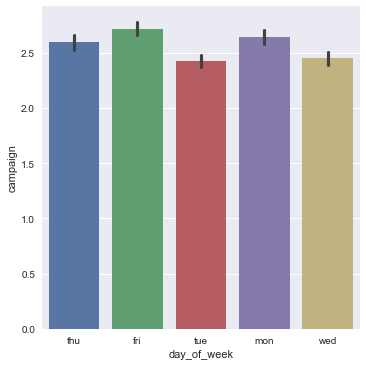

<Figure size 1800x1800 with 0 Axes>

In [12]:
# Melakukan visualisasi dari catplot untuk kolom day_of_week

sns.catplot(x="day_of_week", y="campaign", kind="bar", data=data_bank)
plt.figure(figsize=(25, 25))
plt.show()

<AxesSubplot:xlabel='month', ylabel='day_of_week'>

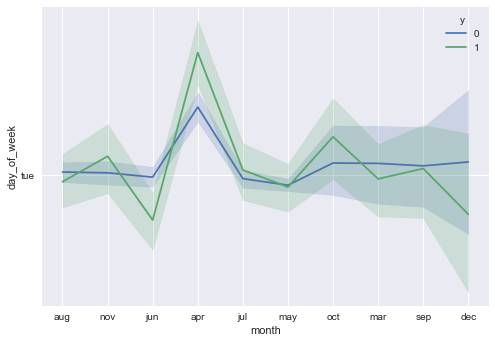

In [13]:
sns.lineplot(x="month", y="day_of_week",
             hue="y", data=data_bank)

## 3. Pre-Processing Data & Visualisasi

In [14]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [15]:
# Mengubah tipe data yang string menjadi int menggunakan LabelEncoder

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()   

data_bank['job']= le.fit_transform(data_bank['job']) 
data_bank['marital']= le.fit_transform(data_bank['marital'])
data_bank['education']= le.fit_transform(data_bank['education'])
data_bank['default']= le.fit_transform(data_bank['default'])
data_bank['housing']= le.fit_transform(data_bank['housing'])
data_bank['loan']= le.fit_transform(data_bank['loan'])
data_bank['contact']= le.fit_transform(data_bank['contact'])
data_bank['month']= le.fit_transform(data_bank['month'])
data_bank['day_of_week']= le.fit_transform(data_bank['day_of_week'])
data_bank['poutcome']= le.fit_transform(data_bank['poutcome'])

data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [16]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

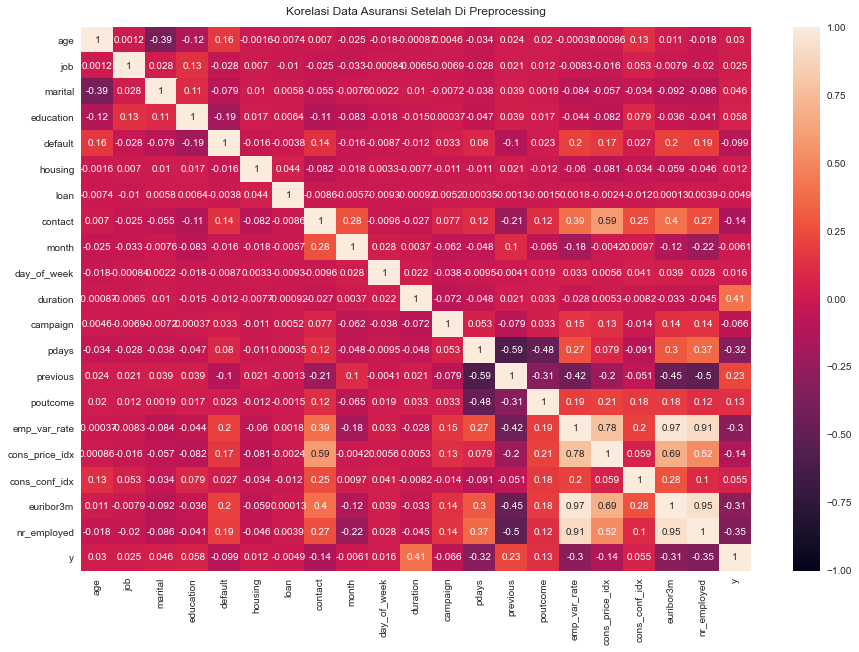

In [17]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(15, 10))

korelasi_data_bank= sns.heatmap(data_bank.corr(), vmin=-1, vmax=1, annot=True)
korelasi_data_bank.set_title("Korelasi Data Asuransi Setelah Di Preprocessing", fontdict={"fontsize":12}, pad=12);

In [18]:
data_bank.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


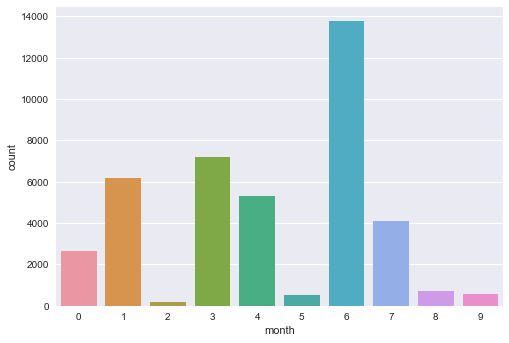

In [19]:
sns.countplot(x='month', data=data_bank)
sns.set(rc={'figure.figsize':(10, 8)})
plt.show()

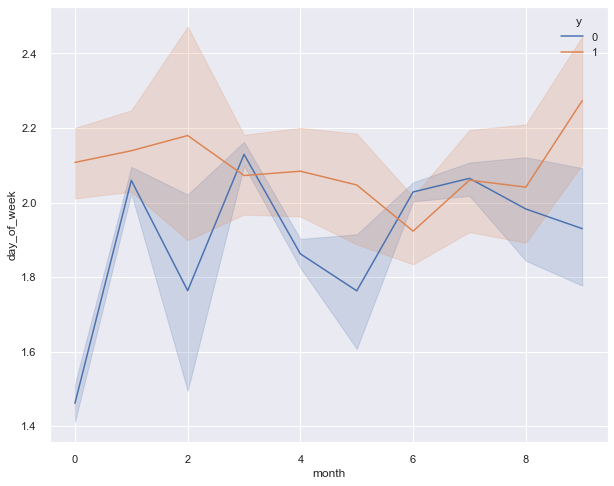

<Figure size 360x360 with 0 Axes>

In [20]:
# Membuat visualisasi time series berdasarkan Tanggal_Asuransi untuk kolom Gender dengan nilai hue=Target
sns.lineplot(data=data_bank, x="month", y="day_of_week", hue="y")
plt.figure(figsize=(5, 5))
plt.show()

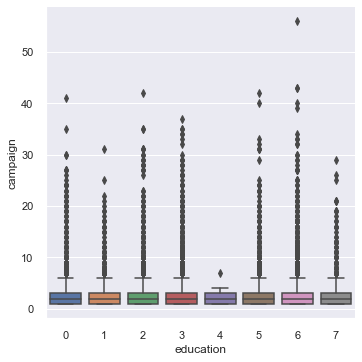

In [21]:
# Membuat visualisasi untuk kolom education
sns.catplot(x="education", y="campaign", kind="box", data=data_bank)

## 4. Mempersiapkan Data Train & Data Test

In [22]:
# Pemisahan data menjadi 2 variable

x = data_bank.drop(["y"], axis=1)

y = data_bank["y"]

In [23]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [24]:
len(x_train)

32950

In [25]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
# Reshaping untuk variabel x_train dan x_test

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## 5. Pemodelan Dengan LSTM

In [66]:
# Membuat jaringan syarat tiruan untuk model LSTM (Long Short Term Memory)
model = Sequential()
 
# Menambah layer LSTM yang pertama dan Dropout regularisation
model.add(LSTM(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang kedua dan Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang ketiga dan Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer LSTM yang keempat dan Dropout regularisation
model.add(LSTM(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan network LSTM kita
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 20, 150)           91200     
_________________________________________________________________
dropout_35 (Dropout)         (None, 20, 150)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 20, 100)           100400    
_________________________________________________________________
dropout_36 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 20, 50)            30200     
_________________________________________________________________
dropout_37 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 23)               

In [69]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 350, validation_data=(x_test, y_test))

Epoch 1/20
95/95 [==============================] - 36s 378ms/step - loss: 0.0876 - accuracy: 0.8924 - val_loss: 0.0801 - val_accuracy: 0.8971
Epoch 2/20
95/95 [==============================] - 34s 361ms/step - loss: 0.0865 - accuracy: 0.8944 - val_loss: 0.0784 - val_accuracy: 0.9001
Epoch 3/20
95/95 [==============================] - 34s 357ms/step - loss: 0.0851 - accuracy: 0.8951 - val_loss: 0.0791 - val_accuracy: 0.8901
Epoch 4/20
95/95 [==============================] - 35s 364ms/step - loss: 0.0852 - accuracy: 0.8951 - val_loss: 0.0759 - val_accuracy: 0.9012
Epoch 5/20
95/95 [==============================] - 34s 359ms/step - loss: 0.0833 - accuracy: 0.8971 - val_loss: 0.0769 - val_accuracy: 0.8991
Epoch 6/20
95/95 [==============================] - 34s 359ms/step - loss: 0.0828 - accuracy: 0.8972 - val_loss: 0.0760 - val_accuracy: 0.8958
Epoch 7/20
95/95 [==============================] - 41s 430ms/step - loss: 0.0812 - accuracy: 0.8971 - val_loss: 0.0737 - val_accuracy: 0.8999

### Melihat Tingkat Akurasi Pada Variable Test Di LSTM

In [71]:
# Melakukan pengujian untuk variable test
y_pred_test = model.predict(x_test)
y_pred_test

array([[0.01543653],
       [0.0187931 ],
       [0.03705442],
       ...,
       [0.01287967],
       [0.21650505],
       [0.00660176]], dtype=float32)

In [72]:
# Pengukuran performa 
from sklearn.metrics import confusion_matrix

tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

7204 97 673 264


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7187.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 114.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 687.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 250. 

In [73]:
# Menampilkan tingkat akurasi dari algoritma LSTM
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7301
           1       0.73      0.28      0.41       937

    accuracy                           0.91      8238
   macro avg       0.82      0.63      0.68      8238
weighted avg       0.89      0.91      0.89      8238



### Melihat Tingkat Akurasi Pada Variable Train di LSTM

In [74]:
# Melakukan pengujian untuk variable test
y_pred_train = model.predict(x_train)
y_pred_train

array([[0.01273661],
       [0.04410481],
       [0.0261719 ],
       ...,
       [0.22834516],
       [0.00978756],
       [0.00776885]], dtype=float32)

In [75]:
# Pengukuran performa 
from sklearn.metrics import confusion_matrix

tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

28853 394 2672 1031


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28834.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 413.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2645.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 1058. 

In [76]:
# Menampilkan tingkat akurasi dari algoritma LSTM
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train.round()))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     29247
           1       0.72      0.28      0.40      3703

    accuracy                           0.91     32950
   macro avg       0.82      0.63      0.68     32950
weighted avg       0.89      0.91      0.89     32950



### Melihat Tingkat Akurasi Dari Kedua Data (Test & Train)

In [77]:
print("Tingkat Akurasi Data Train Di LSTM :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di LSTM :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 21s 20ms/step - loss: 0.0640 - accuracy: 0.9069
Tingkat Akurasi Data Train Di LSTM : [0.06399918347597122, 0.9069499373435974]
258/258 [==============================] - 5s 21ms/step - loss: 0.0644 - accuracy: 0.9065
Tingkat Akurasi Data Test Di LSTM : [0.06444013118743896, 0.9065307378768921]


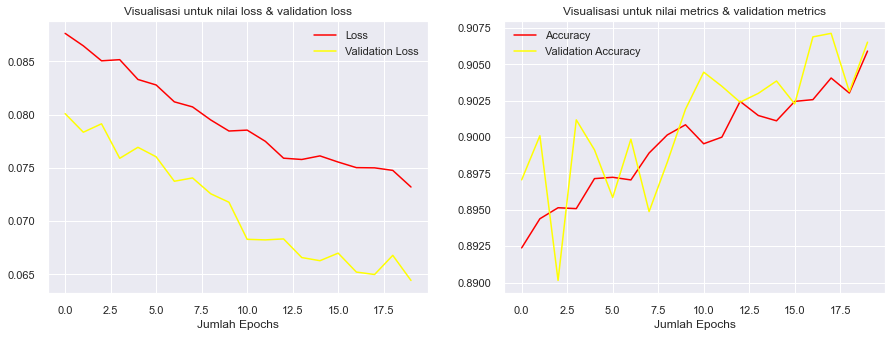

In [86]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

## 6. Pemodelan Dengan RNN

In [87]:
# Membuat jaringan syarat tiruan untuk model RNN dengan layer GRU
model = Sequential()
 
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(GRU(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(GRU(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan network LSTM kita
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 20, 150)           68850     
_________________________________________________________________
dropout_40 (Dropout)         (None, 20, 150)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20, 100)           75600     
_________________________________________________________________
dropout_41 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 20, 50)            22800     
_________________________________________________________________
dropout_42 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 23)               

In [89]:
# Membuat model jaringan syaraf tiruan untuk model rnn dengan layer GRU 
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data=(x_test, y_test))

Epoch 1/20
330/330 [==============================] - 39s 119ms/step - loss: 0.0897 - accuracy: 0.8925 - val_loss: 0.0822 - val_accuracy: 0.8920
Epoch 2/20
330/330 [==============================] - 37s 111ms/step - loss: 0.0859 - accuracy: 0.8932 - val_loss: 0.0775 - val_accuracy: 0.8965
Epoch 3/20
330/330 [==============================] - 37s 111ms/step - loss: 0.0835 - accuracy: 0.8947 - val_loss: 0.0755 - val_accuracy: 0.8933
Epoch 4/20
330/330 [==============================] - 37s 111ms/step - loss: 0.0813 - accuracy: 0.8971 - val_loss: 0.0775 - val_accuracy: 0.8880
Epoch 5/20
330/330 [==============================] - 37s 111ms/step - loss: 0.0797 - accuracy: 0.8987 - val_loss: 0.0702 - val_accuracy: 0.8982
Epoch 6/20
330/330 [==============================] - 37s 111ms/step - loss: 0.0777 - accuracy: 0.9008 - val_loss: 0.0699 - val_accuracy: 0.8972
Epoch 7/20
330/330 [==============================] - 37s 113ms/step - loss: 0.0760 - accuracy: 0.9020 - val_loss: 0.0652 - val_ac

### Melihat Tingkat Akurasi Pada Variable Test di RNN

In [90]:
# Melakukan prediksi terhadap variable test
y_pred_test = model.predict(x_test)
y_pred_test

array([[-0.0028172 ],
       [-0.00251263],
       [-0.00321429],
       ...,
       [-0.01573806],
       [ 0.3456932 ],
       [-0.00678668]], dtype=float32)

In [91]:
from sklearn.metrics import confusion_matrix
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

7187 114 618 319


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7216.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 85.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 687.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 250. 

In [92]:
# Melihat tingkat akurasi untuk data test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.74      0.34      0.47       937

    accuracy                           0.91      8238
   macro avg       0.83      0.66      0.71      8238
weighted avg       0.90      0.91      0.90      8238



### Melihat Tingkat Akurasi Pada Variable Train di RNN

In [94]:
# Melakukan prediksi terhadap variable test
y_pred_train = model.predict(x_train)
y_pred_train

array([[ 0.00470074],
       [ 0.04525585],
       [ 0.00832928],
       ...,
       [ 0.5165554 ],
       [-0.00142386],
       [ 0.00664918]], dtype=float32)

In [95]:
from sklearn.metrics import confusion_matrix
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

28812 435 2360 1343


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28939.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 308.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 2710.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 993. 

In [96]:
# Melihat tingkat akurasi untuk data train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train.round()))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     29247
           1       0.76      0.36      0.49      3703

    accuracy                           0.92     32950
   macro avg       0.84      0.67      0.72     32950
weighted avg       0.91      0.92      0.90     32950



### Melihat Tingkat Akurasi Dari Kedua Data (Train & Test)

In [98]:
print("Akurasi Data Train Di RNN:", model.evaluate(x_train, y_train))
print("Akurasi Data Test Di RNN:", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 17s 17ms/step - loss: 0.0579 - accuracy: 0.9152
Akurasi Data Train Di RNN: [0.05790037661790848, 0.9151744842529297]
258/258 [==============================] - 4s 16ms/step - loss: 0.0612 - accuracy: 0.9111
Akurasi Data Test Di RNN: [0.06120758503675461, 0.9111434817314148]


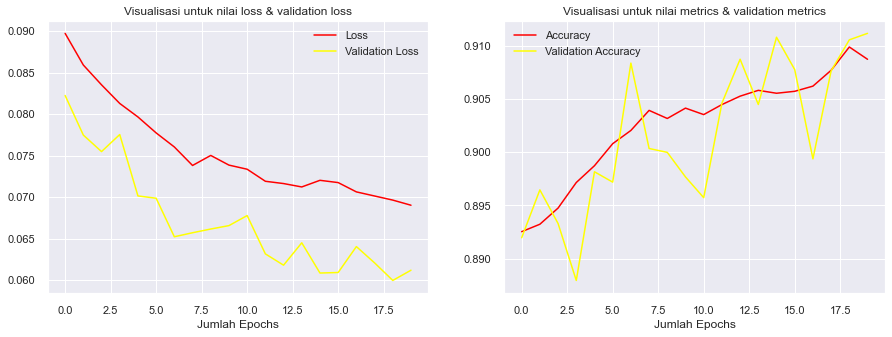

In [99]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();

## 6. Pemodelan Dengan CNN

In [116]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Menambah layer CNN yang pertama dan Dropout regularisation
model.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang kedua dan Dropout regularisation
model.add(Conv1D(filters=100, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang ketiga dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
 
# Menambah layer CNN yang keempat dan Dropout regularisation
model.add(Conv1D(filters=50, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))

# Melihat rancangan network CNN yang telah dibuat
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 16, 150)           900       
_________________________________________________________________
dropout_59 (Dropout)         (None, 16, 150)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 12, 100)           75100     
_________________________________________________________________
dropout_60 (Dropout)         (None, 12, 100)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 8, 50)             25050     
_________________________________________________________________
dropout_61 (Dropout)         (None, 8, 50)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 50)           

In [121]:
# Membuat model jaringan syaraf tiruan untuk model CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size = 200, validation_data=(x_test, y_test))

Epoch 1/20
165/165 [==============================] - 10s 57ms/step - loss: 0.0820 - accuracy: 0.8981 - val_loss: 0.0653 - val_accuracy: 0.9039
Epoch 2/20
165/165 [==============================] - 10s 58ms/step - loss: 0.0668 - accuracy: 0.9034 - val_loss: 0.0638 - val_accuracy: 0.9035
Epoch 3/20
165/165 [==============================] - 9s 57ms/step - loss: 0.0661 - accuracy: 0.9052 - val_loss: 0.0628 - val_accuracy: 0.9058
Epoch 4/20
165/165 [==============================] - 10s 58ms/step - loss: 0.0645 - accuracy: 0.9074 - val_loss: 0.0615 - val_accuracy: 0.9087
Epoch 5/20
165/165 [==============================] - 10s 59ms/step - loss: 0.0621 - accuracy: 0.9090 - val_loss: 0.0616 - val_accuracy: 0.9110
Epoch 6/20
165/165 [==============================] - 9s 57ms/step - loss: 0.0614 - accuracy: 0.9090 - val_loss: 0.0598 - val_accuracy: 0.9099
Epoch 7/20
165/165 [==============================] - 9s 55ms/step - loss: 0.0637 - accuracy: 0.9069 - val_loss: 0.0597 - val_accuracy: 0.

### Melihat Tingkat Akurasi Pada Variable Test Di CNN

In [122]:
# Melakukan prediksi untuk variable test
y_pred_test = model.predict(x_test)
y_pred_test

array([[ 0.00805481],
       [ 0.01254471],
       [ 0.02043273],
       ...,
       [ 0.00640582],
       [ 0.37762272],
       [-0.0022303 ]], dtype=float32)

In [123]:
from sklearn.metrics import confusion_matrix
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test.round()).ravel()
print(tp, tn, fp, fn)

7172 129 593 344


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7098.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 203.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 492.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 445. 

In [124]:
# Melihat tingkat akurasi pada variable test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.73      0.37      0.49       937

    accuracy                           0.91      8238
   macro avg       0.83      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



### Melihat Tingkat Akurasi Pada Variable Train Di CNN

In [125]:
# Melihat prediksi pada variable train
y_pred_train = model.predict(x_train)
y_pred_train

array([[ 0.01331807],
       [ 0.04862453],
       [ 0.03431267],
       ...,
       [ 0.56262094],
       [ 0.00678571],
       [-0.01094421]], dtype=float32)

In [126]:
from sklearn.metrics import confusion_matrix
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train.round()).ravel()
print(tp, tn, fp, fn)

28753 494 2326 1377


Ket:
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 28420.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 827.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 1914.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 1789. 

In [127]:
# Melihat tingkat akurasi pada variable train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train.round()))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29247
           1       0.74      0.37      0.49      3703

    accuracy                           0.91     32950
   macro avg       0.83      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950



### Melihat Tingkat Akurasi Dari Kedua Data (Train & Test)

In [128]:
print("Tingkat Akurasi Data Train Di CNN :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di CNN :", model.evaluate(x_test, y_test))

1030/1030 [==============================] - 5s 4ms/step - loss: 0.0572 - accuracy: 0.9144
Tingkat Akurasi Data Train Di CNN : [0.05719180032610893, 0.9144157767295837]
258/258 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9124
Tingkat Akurasi Data Test Di CNN : [0.0593414269387722, 0.9123573899269104]


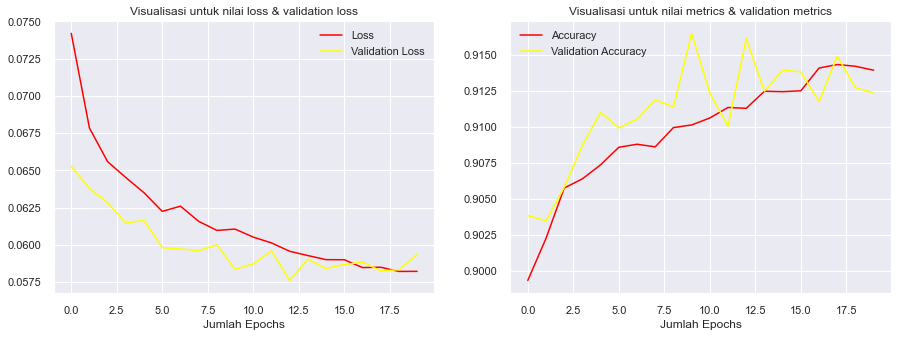

In [129]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="red", label="Loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# Membuat visualisasi untuk nilai akurasi dan validation akurasi
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="red", label="Accuracy")
plt.plot(history.history['val_accuracy'], color="yellow", label="Validation Accuracy")
plt.title("Visualisasi untuk nilai metrics & validation metrics")
plt.xlabel("Jumlah Epochs")
plt.legend()
plt.show();